<a href="https://colab.research.google.com/github/srujanreddy27/Machine_Learning/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# A1: Linear Regression with one attribute
def linear_regression_one_attr(X_train, y_train):
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    return y_train_pred, reg

In [19]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

In [20]:
def linear_regression_multi_attr(X_train, y_train):
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    return y_train_pred, reg


In [21]:
def kmeans_clustering(X_train, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X_train)
    return kmeans.labels_, kmeans.cluster_centers_

In [22]:
def clustering_scores(X_train, labels):
    silhouette = silhouette_score(X_train, labels)
    ch_score = calinski_harabasz_score(X_train, labels)
    db_score = davies_bouldin_score(X_train, labels)
    return silhouette, ch_score, db_score

In [23]:
def kmeans_clustering_different_k(X_train, k_values):
    scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
        silhouette = silhouette_score(X_train, kmeans.labels_)
        ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
        db_score = davies_bouldin_score(X_train, kmeans.labels_)
        scores.append((k, silhouette, ch_score, db_score))
    return scores

In [24]:
def elbow_plot(X_train, k_values):
    distortions = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k).fit(X_train)
        distortions.append(kmeans.inertia_)
    plt.plot(k_values, distortions)
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

A1 - Linear Regression (one attribute) Predictions: [5.76129354 5.76129354 5.76129354 ... 5.4159775  5.4159775  6.01573937]
A2 - Metrics: MSE=5.827585294124424, RMSE=2.4140392072467307, MAPE=40879262076688.13, R2=0.008104403301690488
A3 - Linear Regression (multiple attributes) Predictions: [5.68185212 5.68185212 5.68185212 ... 4.43776835 4.43776835 5.90845458]
A4 - K-means Clustering Labels: [0 0 0 ... 1 1 0]
A4 - K-means Clustering Centers: [[-0.10278719  0.27419104]
 [-0.00343718  0.01998026]]
A5 - Clustering Scores: Silhouette=0.6174860383902301, CH Score=1573.3394034043624, DB Score=0.44101353145877376


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

A6 - K-means Clustering Results for different k values: [(2, 0.6174860383902301, 1573.3394034043624, 0.44101353145877376), (3, 0.5543988541757593, 2317.4481812278655, 0.5868411087290749), (4, 0.6119709580104943, 3235.43690345187, 0.5651959387192778), (5, 0.5563976379933506, 3159.8458796889036, 0.6898432907167663), (6, 0.5784105105159872, 3284.9054807028274, 0.6934363432632421), (7, 0.6246735098332621, 3534.8542514924293, 0.5932833353464669), (8, 0.6524470504665113, 4342.758175295154, 0.571366463142304), (9, 0.6792491699285002, 4550.4812033740045, 0.5680908691168942)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


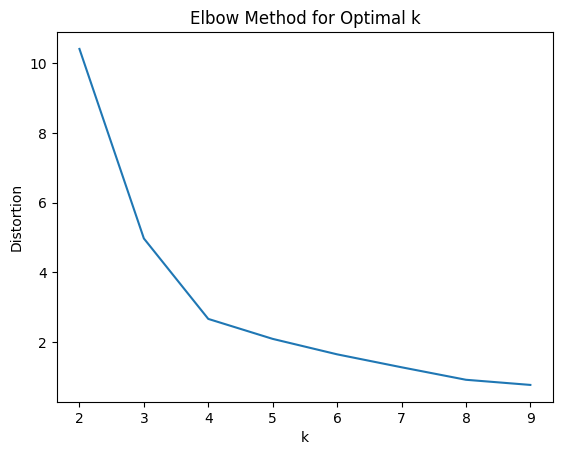

In [26]:
data = pd.read_excel(r"CE_vector_v3.xlsx")
X_train = data[["Control_Flow_Structures_Vector_0", "Control_Flow_Structures_Vector_1"]]
y_train = data["Final_Marks"]
# A1
y_train_pred_one, reg_one = linear_regression_one_attr(X_train[["Control_Flow_Structures_Vector_0"]], y_train)
print("A1 - Linear Regression (one attribute) Predictions:", y_train_pred_one)

# A2
mse, rmse, mape, r2 = calculate_metrics(y_train, y_train_pred_one)
print(f"A2 - Metrics: MSE={mse}, RMSE={rmse}, MAPE={mape}, R2={r2}")

# A3
y_train_pred_multi, reg_multi = linear_regression_multi_attr(X_train, y_train)
print("A3 - Linear Regression (multiple attributes) Predictions:", y_train_pred_multi)

# A4
labels, centers = kmeans_clustering(X_train)
print("A4 - K-means Clustering Labels:", labels)
print("A4 - K-means Clustering Centers:", centers)

# A5
silhouette, ch_score, db_score = clustering_scores(X_train, labels)
print(f"A5 - Clustering Scores: Silhouette={silhouette}, CH Score={ch_score}, DB Score={db_score}")

# A6
k_values = range(2, 10)
clustering_results = kmeans_clustering_different_k(X_train, k_values)
print("A6 - K-means Clustering Results for different k values:", clustering_results)

# A7
elbow_plot(X_train, k_values)